In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [2]:
# Specify the File Path
file_path = '/Users/kwonheejin/Documents/딥러닝 응용/데이터 셋/Raisin_Dataset/Raisin_Dataset.xlsx'

# Load File  
data = pd.read_excel(file_path)

# A quick view
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Label')

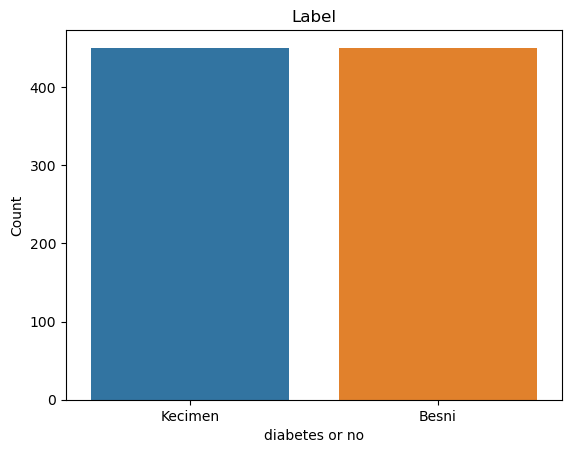

In [6]:
sns.countplot(data = data, x="Class")
plt.xlabel("diabetes or no")
plt.ylabel("Count")
plt.title("Label")

In [7]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [8]:
# "Class" 컬럼의 값을 변환할 매핑 딕셔너리 생성
class_mapping = {"Kecimen": 0, "Besni": 1}

# "Class" 컬럼 값 변환
data["Class"] = data["Class"].replace(class_mapping)

In [9]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


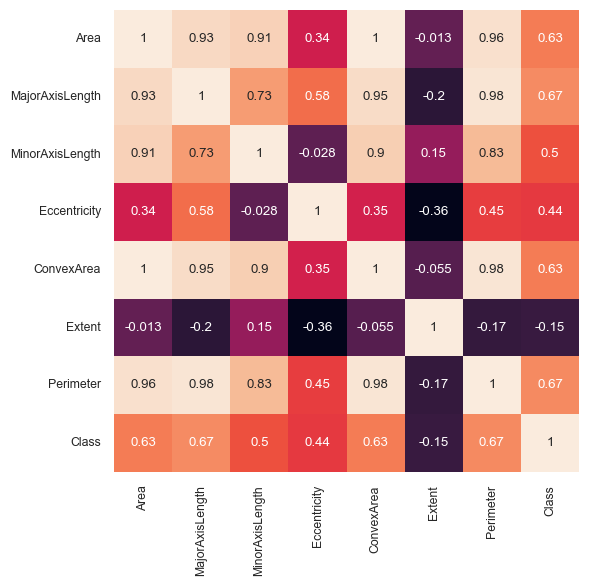

In [10]:
df_corr = data.corr()

plt.figure(figsize=(6, 6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,7].values

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [12]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, 7.21684066e-01,
        1.06264000e+05, 7.41098519e-01],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, 8.45738510e-01,
        9.76530000e+04, 6.58798253e-01],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, 9.07345395e-01,
        8.91970000e+04, 6.32019963e-01]])

In [13]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(6,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 49        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 2)                 16        
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_history=model.fit(x=x_train, y=y_train, epochs=100, batch_size=32,validation_data= (x_test,y_test))
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7097 - val_loss: 0.4765 - val_accuracy: 0.7889
Epoch 2/100
23/23 [==============================] - 0s 674us/step - loss: 0.6093 - accuracy: 0.6667 - val_loss: 0.6220 - val_accuracy: 0.6278
Epoch 3/100
23/23 [==============================] - 0s 690us/step - loss: 0.5479 - accuracy: 0.7250 - val_loss: 0.7569 - val_accuracy: 0.5611
Epoch 4/100
23/23 [==============================] - 0s 686us/step - loss: 0.6570 - accuracy: 0.6333 - val_loss: 0.5044 - val_accuracy: 0.8000
Epoch 5/100
23/23 [==============================] - 0s 737us/step - loss: 0.5247 - accuracy: 0.7625 - val_loss: 0.6264 - val_accuracy: 0.6611
Epoch 6/100
23/23 [==============================] - 0s 700us/step - loss: 0.5607 - accuracy: 0.7000 - val_loss: 0.5040 - val_accuracy: 0.8000
Epoch 7/100
23/23 [==============================] - 0s 694us/step - loss: 0.5089 - accuracy: 0.7542 - val_loss: 0.5759 - val_accuracy: 0.6778
E

Epoch 58/100
23/23 [==============================] - 0s 695us/step - loss: 0.4646 - accuracy: 0.7833 - val_loss: 0.4389 - val_accuracy: 0.8444
Epoch 59/100
23/23 [==============================] - 0s 676us/step - loss: 0.4682 - accuracy: 0.8014 - val_loss: 0.4424 - val_accuracy: 0.8444
Epoch 60/100
23/23 [==============================] - 0s 712us/step - loss: 0.4596 - accuracy: 0.8069 - val_loss: 0.4390 - val_accuracy: 0.8278
Epoch 61/100
23/23 [==============================] - 0s 677us/step - loss: 0.4605 - accuracy: 0.7889 - val_loss: 0.4333 - val_accuracy: 0.8444
Epoch 62/100
23/23 [==============================] - 0s 663us/step - loss: 0.4591 - accuracy: 0.8056 - val_loss: 0.4337 - val_accuracy: 0.8389
Epoch 63/100
23/23 [==============================] - 0s 646us/step - loss: 0.4609 - accuracy: 0.7958 - val_loss: 0.4439 - val_accuracy: 0.8278
Epoch 64/100
23/23 [==============================] - 0s 630us/step - loss: 0.4540 - accuracy: 0.8042 - val_loss: 0.4383 - val_accuracy:

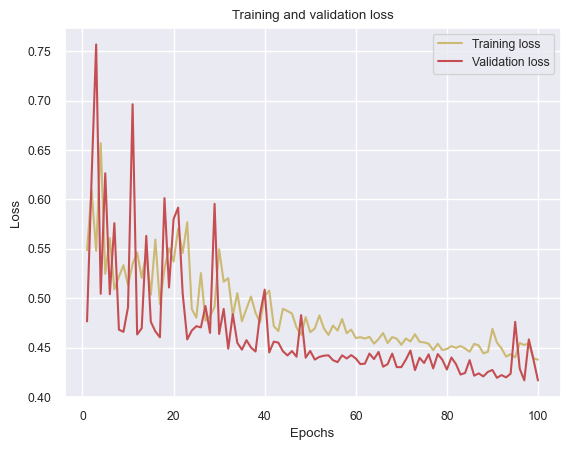

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

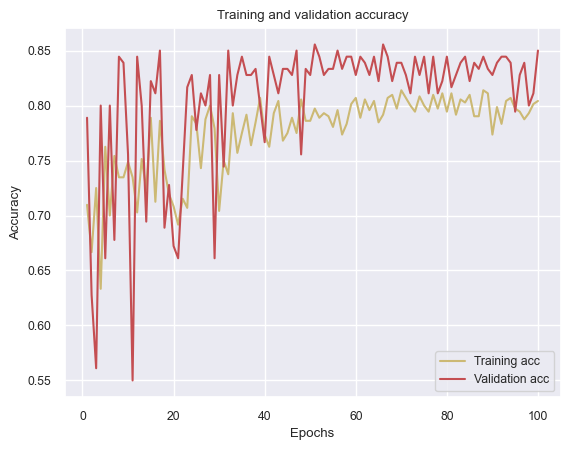

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        83
           1       0.85      0.88      0.86        97

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

[[68 15]
 [12 85]]
